<a href="https://colab.research.google.com/github/ArasBozk/Price-Prediction-AirBNB/blob/master/Price_Prediction_in_NYC_AirBnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction in NYC AirBnb Open Data  

# Introduction

Main goal of this project is predicting NYC AibBnb rental prices based of provided information from "NYC AirBnb Open Data" and "NYC Transit Subway Entrance and Exit Data. With these predictions, customers will have knowledge of if they are overpaying or underpaying. 

Addition to prediction, factors that determine AirBnb rental prices, correlation between price and other variables, distribution of numerical and non-numerical variables across NYC will be shown with graphs, histogram tables and maps. 

Project is divided 2 main steps.
1. Data Manupulation and Feature Engineering
  - Data Cleaning
  - Distribution of Variables
  - Correlation between Variables
2. Prediction and Regression Analysis   
  - Predicting rental prices based on Linear Regression, Decision Tree Regression, Random Forest Regression and MLP techniques. 
  - Applying hyperparameter tuning. 
  - Comparison of these techniques and results.
3. Conclusion

Dataset links: 

  - NYC AirBnb: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/data#

  - NYC Subway: https://data.ny.gov/widgets/i9wp-a4ja


## Utilized Datasets



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
%matplotlib inline

df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"))
df_sub = pd.read_csv(join(path_prefix, "NYC_Transit_Subway_Entrance_And_Exit_Data.csv"))

Mounted at /content/drive


### NYC_AIRBNB

AB_NYC_2019 dataset has 16 different columns and 48895 rows

  - **id:** listing ID
  - **name:** name of the listing
  - **host_id:** host ID
  - **host_name:** name of the host
  - **neighbourhood_group:** location
  - **neighbourhood:** area
  - **latitude:** latitude coordinates
  - **longitude:** longitude coordinates
  - **room_type:** listing space type
  - **price:** price in dollars
  - **minimum_nights:** amount of nights minimum
  - **number_of_reviews:** number of reviews
  - **last_review:** latest review
  - **reviews_per_month:** number of reviews per month
  - **calculated_host_listings_count:** amount of listing per host
  - **availability_365:** number of days when listing is available for booking

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### NYC_SUBWAY 
"NYC_Transit_Subway_Entrance_And_Exit_Data" dataset has 32 different columns and 1867 rows

  - **Division:** Division of the station 
  - **Line:** Subway line
  - **Station Name:** Station name
  - **Station Latitude:** Station latitude 
  - **Station Longitude:** Station longitude
  - **Root 1-11:** Roots
  - **Entrance Type:** Entrance Type
  - **Entry:** Can be used for entry 
  - **Exit Only:** Can be used for only exit
  - **Vending:** There are vendings or not
  - **Staffing:** There are staffs or not
  - **Staff Hours:** -
  - **ADA:** -
  - **ADA Notes:** -
  - **Free Crossover:** Crossovers are free or not
  - **North South Street:** Name of north south street
  - **East West Street:** Name of east wests street
  - **Corner:** -
  - **Entrance Latitude:** Entrance latitude
  - **Entrance Longitude:** Entrance longitude
  - **Station Location:** Sntrance Location
  - **Entrance Location:** Entrance Location

In [ ]:
df_sub.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


# 1-Data Exploration

In this section, data sets will be deeply analized. 

 - Replacing/Deleting of missing values.
 - Cleaning unwanted data
 - Presenting distribution of numerical variable in histogram tables, and graphs
 - Changing certain variables' type
 - Showing distribution of certain non-numerical variables accross NYC map
 - Correlation between certain variables, will be shown respectively with an analysis. 

## Data Manupulation

### AIRBNB

#### Information

Check if any of the variables need to be changed to another type. 


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

All of the variables are fine for our study except 'last review' column. So we need to change it to date object. 

In [ ]:
df['last_review']=pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

#### Data Cleaning - Missing Values
First thing to do is remove unnecessary columns such as 'name', 'id', host id' and 'host name'. Then we need to find all missing values, afterwards remove them or replace by 0.

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df = df.drop(['name','id','host_name','host_id'],axis=1)

Also we need to get rid of rows which price value is 0. If should be counted as an error.

In [ ]:
df[["last_review","reviews_per_month"]] = df[["last_review","reviews_per_month"]].fillna(0)

print("Total number of rows: ",len(df))
print("Number of rows that price = 0: ",len(df[df['price']==0]))
print("-After dropping rows-")
df = df[df.price != 0 ]
print("Total number of rows: ",len(df['price']))
print("Number of rows that price = 0: ",len(df[df['price']==0]))

df.isnull().sum()

Total number of rows:  48895
Number of rows that price = 0:  11
-After dropping rows-
Total number of rows:  48884
Number of rows that price = 0:  0


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

As a result: 

  - Type of the 'last_review' column was changed to datetime
  - Unnecessary columns such as 'name', 'id', host id' and 'host name' were dropped.  
  - Prices that equals to 0 were dropped.
  - 10052 NAN values  are replaced by 0.

###SUBWAY

####Information
Check if any of the variables need to be changed to another type. 

In [ ]:
df_sub.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Division            1868 non-null   object 
 1   Line                1868 non-null   object 
 2   Station Name        1868 non-null   object 
 3   Station Latitude    1868 non-null   float64
 4   Station Longitude   1868 non-null   float64
 5   Route1              1868 non-null   object 
 6   Route2              1020 non-null   object 
 7   Route3              494 non-null    object 
 8   Route4              321 non-null    object 
 9   Route5              238 non-null    object 
 10  Route6              127 non-null    object 
 11  Route7              80 non-null     object 
 12  Route8              48 non-null     float64
 13  Route9              28 non-null     float64
 14  Route10             23 non-null     float64
 15  Route11             23 non-null     float64
 16  Entran

#### Data Cleaning - Missing Values
We need to drop the columns that we will not use later on. 
Also find all missing values, afterwards remove them or replace by some values.

<font color = 'red'> `Note: `</font> My main purpose of taking NYC Subway dataset as second dataset is analyse the effect of the distance between rentals and subway station over price. By doing this, I tried to use Subway Entrances' locations to calculate distance. However, compiling takes approx. 4 hours to finish in Colab. So I decided to take only Station Location which is less accurate but almost 4 times faster (*NYC_SUBWAY-Numerical Variables*). That is why I dropped duplicates from data.  

In [ ]:
df_sub.drop_duplicates(subset =["Station Name"],keep = 'last', inplace = True) 
len(df_sub['Station Name'])

356

We will use only the Station Location to find distance between subway station and rentals. So we need to drop other columns.

In [ ]:
df_sub.drop(df_sub.iloc[:,5:32],inplace= True, axis=1)
df_sub.drop(df_sub.iloc[:,0:3],inplace= True, axis=1)
df_sub.head()

,Station Latitude,Station Longitude
1,40.660397,-73.998091
8,40.648939,-74.010006
13,40.645069,-74.014034
30,40.616622,-74.030876
32,40.670847,-73.988302


In [ ]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 1 to 1867
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station Latitude   356 non-null    float64
 1   Station Longitude  356 non-null    float64
dtypes: float64(2)
memory usage: 8.3 KB


In [ ]:
df_sub.isnull().sum()

Station Latitude     0
Station Longitude    0
dtype: int64

##Distribution of Variables

In this section, we will see distribution of numerical and non-numerical variables in histogram tables, graphs and maps. In addition, data manupulation will be done according to the graphs and tables by log transform and converting non-numerical values into numarical values. 

###NYC_AIRBNB

#### Numerical Variables

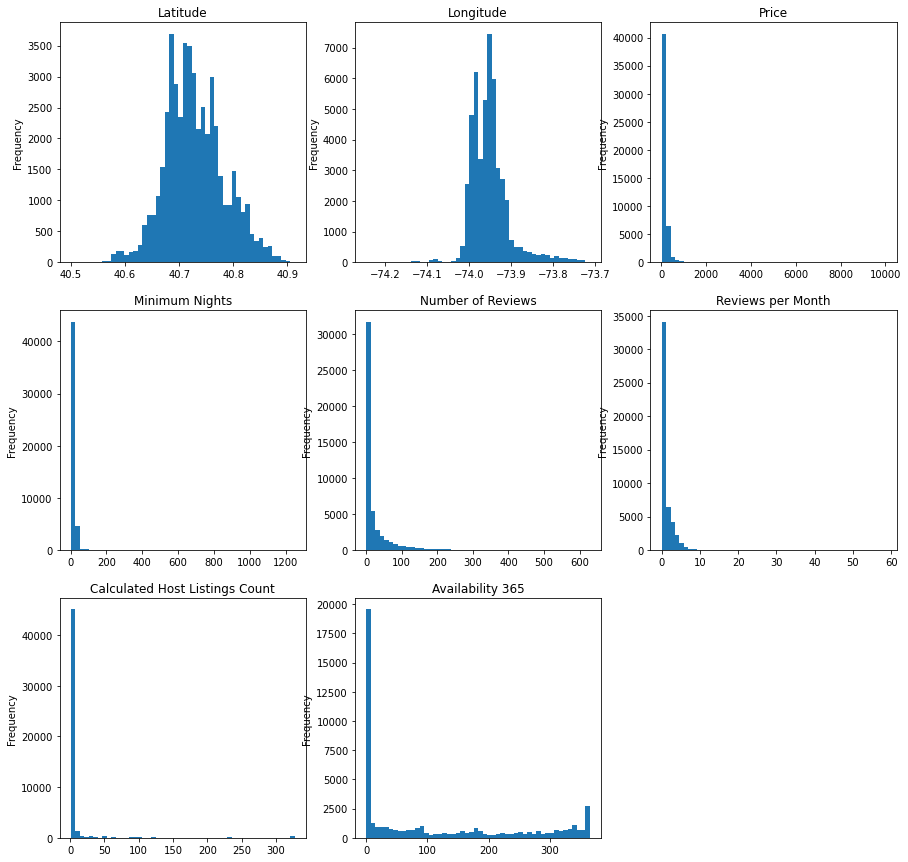

In [ ]:
fig = plt.figure(figsize=(15,15))
x1 = fig.add_subplot(3,3,1)
x2 = fig.add_subplot(3,3,2)
x3 = fig.add_subplot(3,3,3)
x4 = fig.add_subplot(3,3,4)
x5 = fig.add_subplot(3,3,5)
x6 = fig.add_subplot(3,3,6)
x7 = fig.add_subplot(3,3,7)
x8 = fig.add_subplot(3,3,8)

x1.hist(df['latitude'],bins=50)
x2.hist(df['longitude'],bins=50)
x3.hist(df['price'],bins=50)
x4.hist(df['minimum_nights'],bins=50)
x5.hist(df['number_of_reviews'],bins=50)
x6.hist(df['reviews_per_month'],bins=50)
x7.hist(df['calculated_host_listings_count'],bins=50)
x8.hist(df['availability_365'],bins=50)

x1.set_ylabel('Frequency')
x1.set_title('Latitude')
x2.set_ylabel('Frequency')
x2.set_title('Longitude')
x3.set_ylabel('Frequency')
x3.set_title('Price')
x4.set_ylabel('Frequency')
x4.set_title('Minimum Nights')
x5.set_ylabel('Frequency')
x5.set_title('Number of Reviews')
x6.set_ylabel('Frequency')
x6.set_title('Reviews per Month')
x7.set_ylabel('Frequency')
x7.set_title('Calculated Host Listings Count')
x8.set_ylabel('Frequency')
x8.set_title('Availability 365')

plt.show()

As it shown the graphs above 'price', 'minimum nights', 'number of reviews', 'reviews per month' and 'calculated host listing count' graphs are rightly skewed. For reducing the skewness Normalization Function, Sigmoid Function, Log Function or Log+1 Function can be used. 

For 'price', 'minimum nigths' and 'calculated host listings count' values Log function was used.

Since 'number of reviews' and 'reviews per month' goes negative infinity  Log+1 functions was used to reduce skewness.

Text(0.5, 1.0, 'Log_Calculated_Host_Listings_Count')

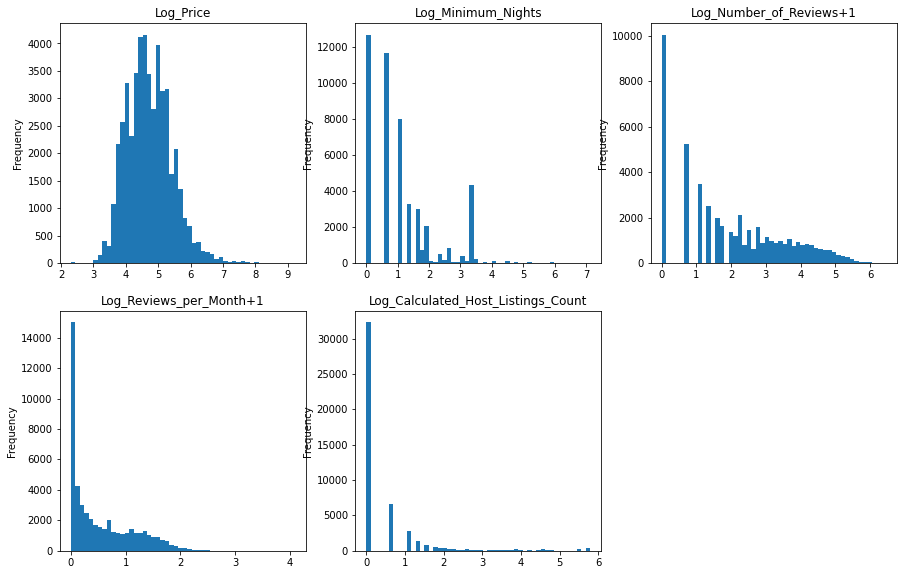

In [ ]:
fig_log = plt.figure(figsize=(15,15))
log_x1 = fig_log.add_subplot(3,3,1)
log_x2 = fig_log.add_subplot(3,3,2)
log_x3 = fig_log.add_subplot(3,3,3)
log_x4 = fig_log.add_subplot(3,3,4)
log_x5 = fig_log.add_subplot(3,3,5)

log_x1.hist(np.log(df['price']),bins=50)
log_x2.hist(np.log(df['minimum_nights']),bins=50)
log_x3.hist(np.log(df['number_of_reviews']+1),bins=50)
log_x4.hist(np.log(df['reviews_per_month']+1),bins=50)
log_x5.hist(np.log(df['calculated_host_listings_count']),bins=50)

log_x1.set_ylabel('Frequency')
log_x1.set_title('Log_Price')
log_x2.set_ylabel('Frequency')
log_x2.set_title('Log_Minimum_Nights')
log_x3.set_ylabel('Frequency')
log_x3.set_title('Log_Number_of_Reviews+1')
log_x4.set_ylabel('Frequency')
log_x4.set_title('Log_Reviews_per_Month+1')
log_x5.set_ylabel('Frequency')
log_x5.set_title('Log_Calculated_Host_Listings_Count')

Distribution of Prices

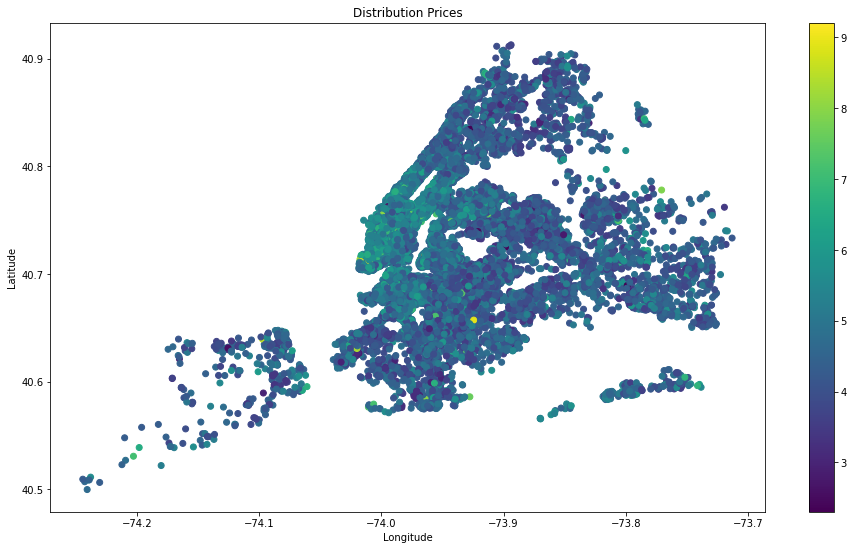

In [ ]:
df['log_price'] = np.log(df['price'])
plt.figure(figsize=(16,9))
plt.scatter(df['longitude'],df['latitude'],c=df['log_price'])
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution Prices")
plt.show()

#### Non-Numerical Variables

Distribution of Neighbour Groups

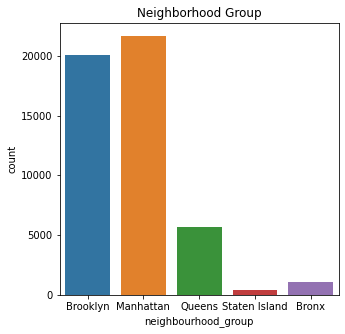

In [ ]:
sns.countplot(df['neighbourhood_group'])
figure = plt.gcf()
figure.set_size_inches(5,5)
plt.title('Neighborhood Group')
plt.show()

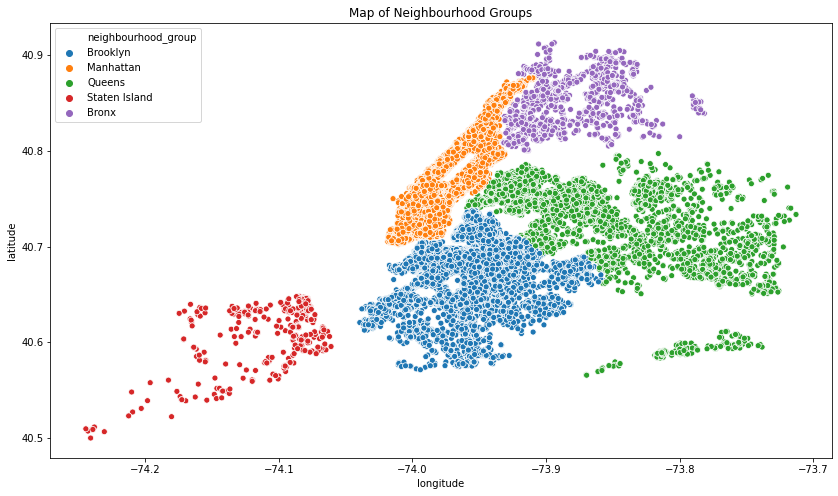

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['longitude'],df['latitude'],hue=df['neighbourhood_group'])
plt.title("Map of Neighbourhood Groups")
plt.show()

Distribution of Room Types


 Private Room: % 45.657065706570656 
 Entire Home/Apt: % 51.97406104246788 
 Shared Room: % 2.36887325096146


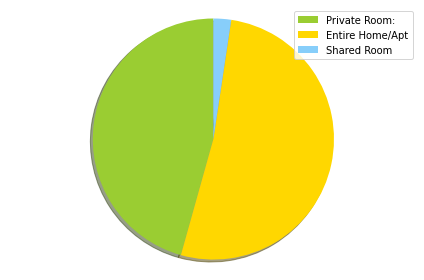

In [ ]:
x1 = len(df.loc[(df['room_type'] == 'Private room')])
x2 = len(df.loc[(df['room_type'] == 'Entire home/apt')])
x3 = len(df.loc[(df['room_type'] == 'Shared room')])

labels = 'Private Room: ', 'Entire Home/Apt', 'Shared Room'
sizes = [x1,x2,x3]
colors = ['yellowgreen', 'gold', 'lightskyblue']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

total=x1+x2+x3
print("\n","Private Room: %",x1*100/total,"\n",'Entire Home/Apt: %' ,x2*100/total,"\n", 'Shared Room: %',x3*100/total)
plt.show()

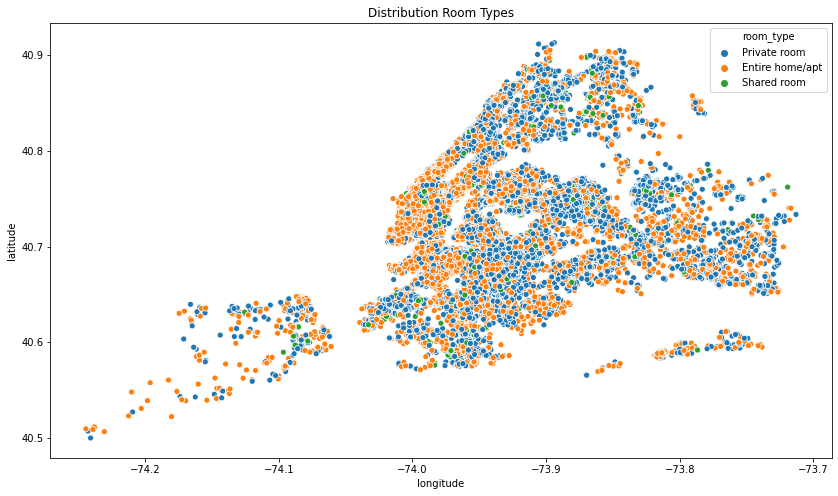

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['longitude'],df['latitude'],hue=df['room_type'])
plt.title("Distribution Room Types")
plt.show()

Room types are non-numerical variables. To show the correlation between price and room types; room types converted to numerical values. 

  - Entire Home/Apt: 3
  - Private Room   : 2 
  - Shared Room    : 1 

Hence, we will see in *Correlation of Variables* if price will increase from Shared Room to Entire Home  or not.  


In [ ]:
r_array = []

for index, row in df.iterrows():
  if row['room_type'] == 'Private room':
    r_array.append(2)
  elif row['room_type'] == 'Entire home/apt': 
    r_array.append(3)
  elif row['room_type'] == 'Shared room':
    r_array.append(1)

df['room'] = r_array
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price,room
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,5.003946,2
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,5.416100,3
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,5.010635,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,4.488636,3
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,4.382027,3


### NYC_SUBWAY

#### Numerical Variables

Map of subway stations 

In [ ]:
import folium

locations = df_sub[['Station Latitude', 'Station Longitude']]
locationlist = locations.values.tolist()

map = folium.Map(location=[40.667397,-73.998991], zoom_start=10.5)

for point in range(0, len(df_sub)):
  folium.Marker(locationlist[point]).add_to(map) 

map

Map of location of subways and price distributions

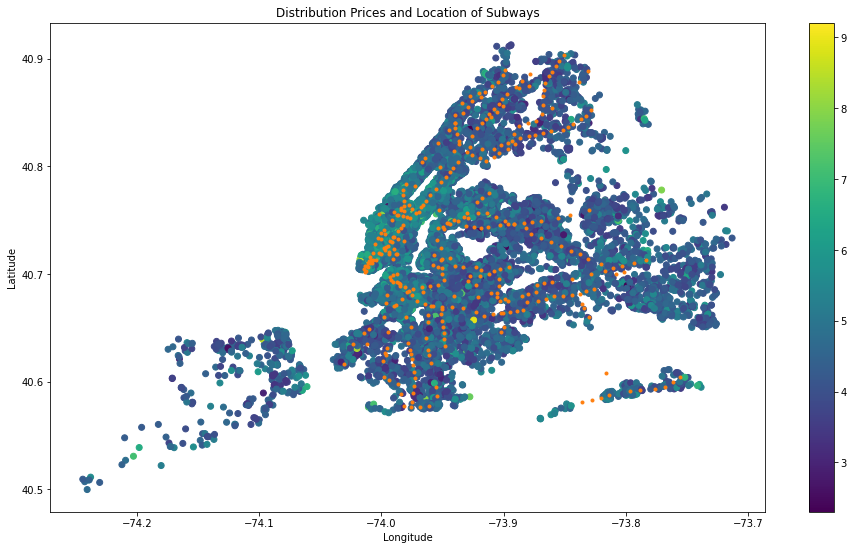

In [ ]:
df['log_price'] = np.log(df['price'])
plt.figure(figsize=(16,9))

plt.scatter(df['longitude'],df['latitude'],c=df['log_price'])
plt.colorbar()

plt.title("Distribution Prices and Location of Subways")

plt.scatter(df_sub['Station Longitude'],df_sub['Station Latitude'],marker=".",c='#ff7f0e',)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


To show distance between rentals and subway stations; all distances between one rental location and all stations will be calculated and the lowest distance will be added in new column named 'Closest_Subway_Dist' for each rental locations.

In [ ]:
from geopy.distance import geodesic

distance_array = []
count_row = df.shape[0]
last_array = []

for index, row in df.iterrows():
  if index%10000 == 0: #for calculation of time for myself
    print (index)
  a_lat = row['latitude']
  a_lon = row['longitude']
  for i, row in df_sub.iterrows():
    s_lat = row['Station Latitude']
    s_lon = row['Station Longitude']
    distance = geodesic((a_lat,a_lon), (s_lat,s_lon)).miles
    if i==1:
      distance_array.append(distance)
    else:
      if distance_array[0] > distance:
        distance_array[0]=distance
  last_array.append(distance_array[0])
  distance_array.pop()

df['Closest_Subway_Dist']=last_array
df.head()

0
10000
20000
30000
40000


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price,room,Closest_Subway_Dist
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,5.003946,2,0.289207
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,5.416100,3,0.095828
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,5.010635,2,0.364288
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,4.488636,3,0.258098
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,4.382027,3,0.124706


### Correlation of Variables

In this section we will study on correlation between price and numerical variables.

Since we are looking for a correlation between numeric variables, Pearson Correlation was used for this purpose. 

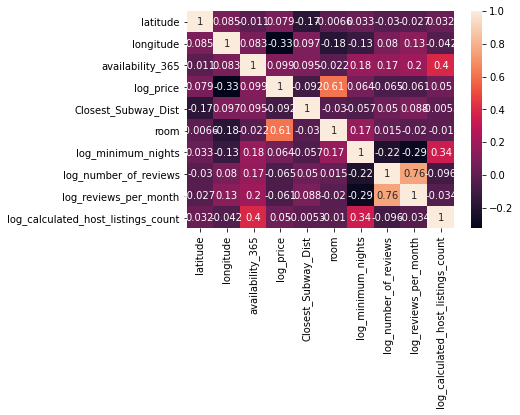

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_corr = df[['latitude','longitude','availability_365','log_price','Closest_Subway_Dist','room']].copy()

df_corr['log_minimum_nights'] = np.log(df['minimum_nights']+1)
df_corr['log_number_of_reviews'] = np.log(df['number_of_reviews']+1)
df_corr['log_reviews_per_month'] = np.log(df['reviews_per_month']+1)
df_corr['log_calculated_host_listings_count'] = np.log(df['calculated_host_listings_count']+1)

corrMatrix = df_corr.corr(method='pearson')
sn.heatmap(corrMatrix, annot=True)
plt.show()

As a result: 

  - Price is **possitively** correlated with room types meaning that customers need to pay more for entire home, private room, shared room respectively.

  - Price is **negatively** correlated with longitude. That means customers need to pay more to rentals that located in the east side of the city.

  - Longitude and room type is **negatively** correlated. Also, as we can see in 'Distribution of Room Types' map in *NYC_AIRBNB - Non-Numerical Variables* , in east side of the city has more 'Entire Home/Apt' rentals than the other types of the room.These situations can cause negative correlation between longitude and price. 

  - Closest subway location has very **weak negative** linear relationship with price. Suprisingly, we may say that rentals that located next to subway has lower price. 

  - Availability in 365, latitude, minimum nights are very **weak possitive** and number of reviews and reviews per month are very **weak negative** linear relationship with price.



# 2- Machine Learning Models

In this section prediction of price will be performed using Linear Regression, Decision Tree Regression, Random Forest Regression and MLP models respectively. To obtain better scores, hyperparameter tuning will be applied to each model except Linear Regression.  

For training, KFold Cross Validation method and for training in Hyperparameter tuning Train-Test Split method is used. 

Since accuracy score is only available for **Classification** problems, we need to use different metrics such as Mean Squared Error, Root Mean Squared Error, Mean Absolute Error. All of these metrics calculates prediction errors performed by a model. Lower error means that the model is working well on the problem set. 




<img height="180" width="400" src="https://1.bp.blogspot.com/-kL42RjXdOEc/XMELxXVMe3I/AAAAAAAABRw/mx2RoIheodwWj0CPAqg9chwXJmpOyPyJQCLcBGAs/s1600/Loss_Functions.PNG"/>


In Root Mean Squared Error and Mean Squared Error, errors are squared before taking their average. So that RMSE and MSE give larger errors. Also they both give more weight to outliers. For our problem, RMSE is used for score metric. 


In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price,room,Closest_Subway_Dist
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,5.003946,2,0.289207
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,5.416100,3,0.095828
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,5.010635,2,0.364288
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,4.488636,3,0.258098
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,4.382027,3,0.124706


In [ ]:
from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score
from matplotlib.legend_handler import HandlerLine2D

In previous sections, variables like 'room_type', 'neighbourhood' etc. were changed to numerical types or if variable was numerical (price), it was changed to another numerical variable (log_price). Thus we need to remove them from the dataset. 



---



In [ ]:
df = df.drop(['neighbourhood_group', 'neighbourhood','room_type','last_review','price'], axis=1)

X = df.drop('log_price', axis=1)
y = df['log_price'] 

In [ ]:
df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,room,Closest_Subway_Dist
0,40.64749,-73.97237,1,9,0.21,6,365,5.003946,2,0.289207
1,40.75362,-73.98377,1,45,0.38,2,355,5.416100,3,0.095828
2,40.80902,-73.94190,3,0,0.00,1,365,5.010635,2,0.364288
3,40.68514,-73.95976,1,270,4.64,1,194,4.488636,3,0.258098
4,40.79851,-73.94399,10,9,0.10,1,0,4.382027,3,0.124706


### Linear Regression

In [ ]:
#Linear Regression
lin_score = []
linreg = LinearRegression()
resl = cross_val_score(linreg, X, y, cv=10, scoring= "neg_mean_squared_error" )
rmse = np.sqrt(np.absolute(resl))
avg_rmse = np.sum(rmse)/len(rmse)
lin_score.append(avg_rmse)
print(lin_score)

[0.514805107202838]


### Decision Tree Regression

Decision Tree Regression Model

In [ ]:
#Decision Tree Regression
dt = DecisionTreeRegressor()
mse = cross_val_score(dt ,X,y, scoring = "neg_mean_squared_error", cv=10) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
print(avg_rmse)

0.64463398108208


#### Hyperparameters

Decision Tree Regression model takes its parameter as: 

sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0

For Hyperparameter Tuning min_samples_leaf and max_depth are examined in this section. 

##### min_samples_leaf

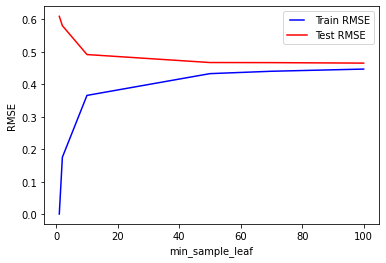

In [ ]:
dt_train = []
dt_test = []
min_samples_leaf = [1,2,10,50,70,100]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)
for leaf in min_samples_leaf:
  rf = DecisionTreeRegressor(min_samples_leaf = leaf, random_state=1)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  dt_train.append(rmse)
  y_pred = rf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  dt_test.append(rmse)
    
line1, = plt.plot(min_samples_leaf, dt_train, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leaf, dt_test, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_sample_leaf')
plt.show()

It is obvious that when min_sample_leafs is below 10, model overfits due to huge difference between training and test scores. We can say that when min_sample_leafs is low, model tends to overfit. And the best score is observed when min_sample_leafs above 100. 

##### max_depths

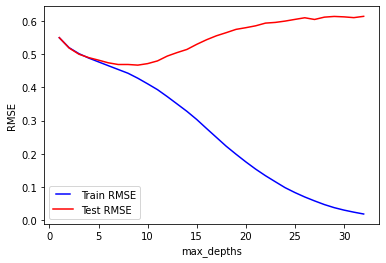

In [ ]:
dt_train = []
dt_test = []
max_depths = np.linspace(1, 32, 32, endpoint=True)
for max_depth in max_depths:
  rf = DecisionTreeRegressor(max_depth=max_depth)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  dt_train.append(rmse)
  y_pred = rf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  dt_test.append(rmse)

line1, = plt.plot(max_depths, dt_train, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, dt_test, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_depths')
plt.show()

It is certain that when max_depth is above 10, model overfits due to huge difference between training and test scores. So, we can say that when max_depth is high, model tends to overfit by contrast with min_sample_leafs. And the best score observed when max_depth is between 5 and 10. 

 #### Final Result

This section, the parameter we found in previous section is applied to our Decision Tree Regression model. 

- min_samples_leaf = 100
- max_depth = 7


In [ ]:
dt = DecisionTreeRegressor(min_samples_leaf=100,max_depth=7)
mse = cross_val_score(dt ,X,y, scoring = "neg_mean_squared_error", cv=10) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
print(avg_rmse)

0.47278446808540203


The RMSE decreased from 0.6446 to 0.4727 with Hyperparameter Tuning. The final results will be compared in Result section.

### Random Forest Regression

Random Forest Regression Model

In [ ]:
#Random Forest
rmse_rf=[]
rf=RandomForestRegressor()
mse = cross_val_score(rf ,X,y, scoring = "neg_mean_squared_error", cv=10) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_rf.append(avg_rmse)
print(rmse_rf)

[0.45597240912629466]


#### Hyperparameters

Random Forest Regression model takes its parameter as: 

sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

For Hyperparameter Tuning n_estimators, min_samples_leaf and max_features are examined in this section. 

##### n_estimators

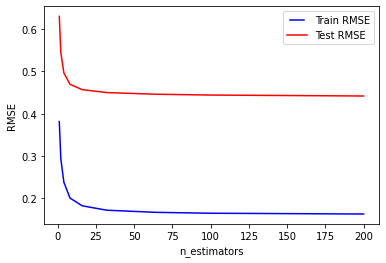

In [ ]:
rf_train = []
rf_test = []

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for estimator in n_estimators:
  rf = RandomForestRegressor(n_estimators=estimator, random_state=1)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  rf_train.append(rmse)
  y_pred = rf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  rf_test.append(rmse)

line1, = plt.plot(n_estimators, rf_train, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, rf_test, 'r', label='Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.show()

The results show that model overfits when number of estimators increases due to large difference between train and test scores. n_estimators = 100 will sufficient for our model. 

##### min_samples_leaf

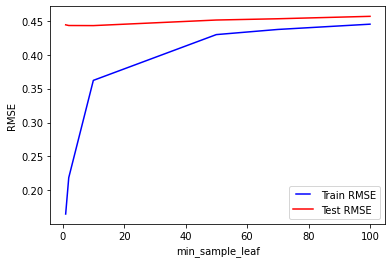

In [ ]:
rf_train = []
rf_test = []
min_samples_leaf = [1,2,10,50,70,100]
for leaf in min_samples_leaf:
  rf = RandomForestRegressor(min_samples_leaf = leaf, random_state=1)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  rf_train.append(rmse)
  y_pred = rf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  rf_test.append(rmse)

line1, = plt.plot(min_samples_leaf, rf_train, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leaf, rf_test, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_sample_leaf')
plt.show()

For min_samples leaf, less leafs causes overfitting like Decision Tree Regression model. Test score does not change due to min_sample_leafs change. However it has slightly lower RMSE when it is between 2 and 10. 

##### max_features


 [0.44423184486529643, 0.4368814595425147, 0.4368814595425147] 
 [0.16488478120299224, 0.16255521793361974, 0.16255521793361974]


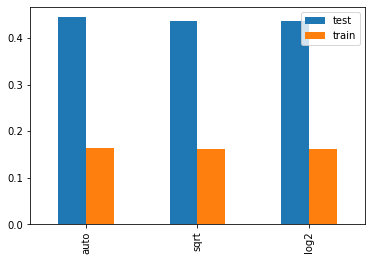

In [ ]:
rf_train = []
rf_test = []
max_features = ['auto','sqrt','log2']
for feature in max_features:
  rf = RandomForestRegressor(max_features=feature, random_state=1)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  rf_train.append(rmse)
  y_pred = rf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  rf_test.append(rmse)

index = ['auto','sqrt','log2']
print('\n',rf_test,'\n',rf_train)
df = pd.DataFrame({'test': rf_test,'train': rf_train}, index=index)
ax = df.plot.bar()

For max_features does not have an impact on RMSE score. All features have almost same RMSE scores.

#### Final Result

This section, the parameter we found in previous section is applied to our Random Forest Regression model. 

- n_estimators = 100
- min_sample_leaf = 2
- max_features = 'sqrt' (can be also 'auto' or 'log2')

In [ ]:
rmse_rf=[]
rf=RandomForestRegressor(n_estimators=100, min_samples_leaf =2 ,max_features = 'sqrt')
mse = cross_val_score(rf ,X,y, scoring = "neg_mean_squared_error", cv=10) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_rf.append(avg_rmse)
print(rmse_rf)

[0.4458280492516689]


The RMSE decreased from 0.4559 to 0.4458 with Hyperparameter Tuning. The final results will be compared in Result section.

### MLP

MLP Model

In [ ]:
#MLP
rmse_nndf=[]
mlp = MLPRegressor(activation='relu')
mse = cross_val_score(mlp ,X,y, scoring = "neg_mean_squared_error", cv=10) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_nndf.append(avg_rmse)
print(rmse_nndf)

[0.5979570847052618]


#### Hyperparameters
MLP model takes its parameter as: 

sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

For Hyperparameter Tuning, activation and hidden_layer_sizes are examined in this section.

##### activation


 [0.43636733787551646, 0.43608328523409895, 0.436441042469251] 
 [0.24255974245267817, 0.24274899502449016, 0.24269121883638936]


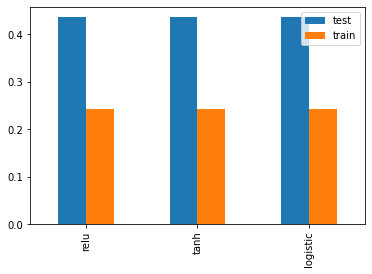

In [ ]:
mlp_train = []
mlp_test= []
activation = ['relu','tanh','logistic']
for feature in activation:
  mlp = MLPRegressor(activation=feature, max_iter=1000)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  mlp_train.append(rmse)
  y_pred = rf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mlp_test.append(rmse)

index = ['relu','tanh','logistic']
print('\n',mlp_test,'\n',mlp_train)
df = pd.DataFrame({'test': mlp_test,'train': mlp_train}, index=index)
ax = df.plot.bar()

For activation does not have an impact on RMSE score. All features have almost same RMSE scores. But it is clearly seen that there is an overfit due to large difference between train and test scores. 

##### hidden_layer_sizes

In [ ]:
train_results = []
test_results = []
hidden_layer_sizes = [(50,50,50), (50,100,50), (100,)]

for i in range(0,3):
  mlp = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes[i])
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  mlp_train.append(rmse)
  y_pred = rf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mlp_test.append(rmse)
  print(rmse)

0.43536854389938423
0.43605105356975166
0.4362055609268704


For hidden layer sizes does not have an impact on RMSE score. All features have almost same RMSE scores. 



<font color = 'red'> `Note: `</font> Only (50,50,50), (50,100,50), (100,) are tried for this purpose. Dİfferent hidden layer sizes and number of neurons inside those hidden layers cannot be tried due to performance and time limit. 

#### Final Result

This section, the parameter we found in previous section is applied to our MLP model. 

- activation = 'relu'
- hidden_layer_sized = (50,50,50)

In [ ]:
rmse_nndf=[]
mlp = MLPRegressor(activation='relu',hidden_layer_sizes=(50,50,50))
mse = cross_val_score(mlp ,X,y, scoring = "neg_mean_squared_error", cv=10) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_nndf.append(avg_rmse)
print(rmse_nndf)

[0.5254536014199664]


## Results & Discussion


<table>
  <thead>
    <tr>
      <th>Machine Learning Model</th>
      <th>Before</th>
      <th>After </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression</td>
      <td>0.5148</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Decision Tree Regression</td>
      <td>0.6446</td>
      <td>0.4727</td>
    </tr>
    <tr>
      <td>Random Forest Regression</td>
      <td>0.4559</td>
      <td>0.4458</td>
    </tr>
    <tr>
      <td>Multi Layer Perceptron</td>
      <td>0.5979</td>
      <td>0.5254</td>
    </tr>
  </tbody>
</table>

We can see RMSE results before and after hyperparameter tuning of four different models, graph above. 

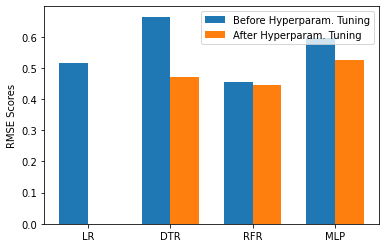

In [ ]:
labels = ['LR','DTR', 'RFR', 'MLP']
before = [0.514,0.664, 0.455, 0.597]
after = [0, 0.472, 0.445, 0.525 ]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before, width, label='Before Hyperparam. Tuning')
rects2 = ax.bar(x + width/2, after, width, label='After Hyperparam. Tuning')

ax.set_ylabel('RMSE Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Random Forest Regression has better RMSE score before and after hyperparameter tuning, followed by Decision Tree Regression, Linear Regression and MLP respectively. 

RMSE of Random Forest Regression is 0.44 (not perfect score to make a prediction) which need to be supported by another method such as R^2 score to decide model can be use for prediction of price. 

<font color = 'red'> `Note: `</font> This line of code was run right after Random Forest Regression/Final Result Part. 

In [ ]:
print("R2 score:" ,round(r2_score(y_test,predicted),2))

R2 score : 0.61


Last result shows that R^2 score is slightly higher than 0.6 and RMSE is less than 0.45. So that, even if we may not have an accurate results we can make a prediction with Random Forest Regression for our purpose.

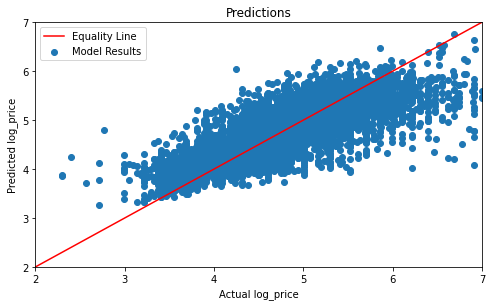

In [ ]:
rf=RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', min_samples_leaf=2, random_state=1)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)

plt.figure(figsize=(8,4.5))
plt.scatter(y_test,predicted, label="Model Results")
plt.plot([2,7],[2,7], color="red", label = "Equality Line")
plt.title("Predictions")
plt.xlim(2,7)
plt.ylim(2,7)
plt.legend()
plt.ylabel("Predicted log_price")
plt.xlabel("Actual log_price")
plt.show()

As we can see 'Predictions' graph above, low actual prices predicted as higher, and high actual prices predicted as lower than as it should be. 

This results in **overpredicting for lower prices** and **underpredicting for higher prices** for Random Forest Regression model

# 3-Conclusion

In conclusion Random Forest Regression model gives us better results for prediction of price followed by Decision Tree Regression, Linear Regression and MLP respectively.

Advantage of Random Forest Regression model is more accurate results than the other models. On the other hand, disadvantage of Random Forest Regression model is it has O(n* log(n) * d * k) (k = number of Decision Trees) time complexity for training, and in additional if we use cross validation to train our model, it takes too much time to train data set. 

Since RMSE of Random Forest Regression is 0.44 and R^2 score is 0.61, solution is applicable. But result may not always give accurate results. For low actual prices model over-predicts and for high actual prices model under-predicts the price. 






